# ELM / CLM / ELM-FATES / CLM-FATES SP mode comparisons

Github issue for discussion: https://github.com/NGEET/fates/issues/797

## Case Settings

CLM-FATES sp mode case settings:
- hlm tag: `ctsm5.1.dev056`
- fates tag: `sci.1.47.0_api.17.0.0`
- compset: `2000_DATM%CRUv7_CLM50%FATES_SICE_SOCN_SROF_SGLC_SWAV`
- resolution: `f45_f45_mg37`
- fates paramfile: `fates_params_api.16.1.0_12pft_c210630`

ELM-FATES sp mode case settings:
- hlm tag: `v2.0.0-rc3-281-g864095fbbe` (based on Ryan's PR)
- fates tag: `sci.1.47.0_api.17.0.0`
- compset: `2000_DATM%CRU_ELM%BGC-FATES_SICE_SOCN_SROF_SGLC_SWAV`
- resolution: `f45_f45`
- fates paramfile: `fates_params_api.16.1.0_12pft_c210630`

History variables included:

`hist_fincl1       = 'NPP','GPP','BTRAN','H2OSOI','TLAI','TSAI','HTOP','ED_NPATCHES','AREA_PLANT','LEAFC',
                    'PFTnindivs','PFTbiomass','PFTleafbiomass','PFTcrownarea'`

## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx

## Load history output data

In [2]:
clm_fates = xr.open_dataset('sp_mode-elm_compare-cru.fates-sci.1.47.0_api.17.0.0-ctsm5.1.dev056-C7761d5bb-Ff32d831f.intel.clm2.h0.2000.nc')
elm_fates = xr.open_dataset('spmode-clm_compare-cru1.fates-sci.1.47.0_api.17.0.0-v2.0.0-C864095fbbe-Ff32d831f.intel.elm.h0.2000.nc')
elm_sp = xr.open_dataset('elm-spmode/spmode-elm_spmode.fates-sci.1.47.0_api.17.0.0-v2.0.0-C864095fbbe-Ff32d831f.intel.elm.h0.2000.nc')
clm_sp = xr.open_dataset('clm-spmode/sp_mode-fatesspcompare.fates-sci.1.47.0_api.17.0.0-ctsm5.1.dev056-C7761d5bb-Ff32d831f.intel.clm2.h0.2000.nc')

## Load surface data sets

In [3]:
clm_surfdata = xr.open_dataset('clm-spmode/surfdata_4x5_hist_16pfts_Irrig_CMIP6_simyr2000_c190214.nc')
elm_surfdata = xr.open_dataset('elm-spmode/surfdata_4x5_simyr2000_c130927.nc')

## TLAI

In [4]:
tlai_clm = clm_fates.TLAI
tlai_elm = elm_fates.TLAI
tlai_elmsp = elm_sp.TLAI
tlai_clmsp = clm_sp.TLAI

### CLM-FATES sp mode versus ELM-FATES sp mode

Text(0.5, 1.0, 'Difference')

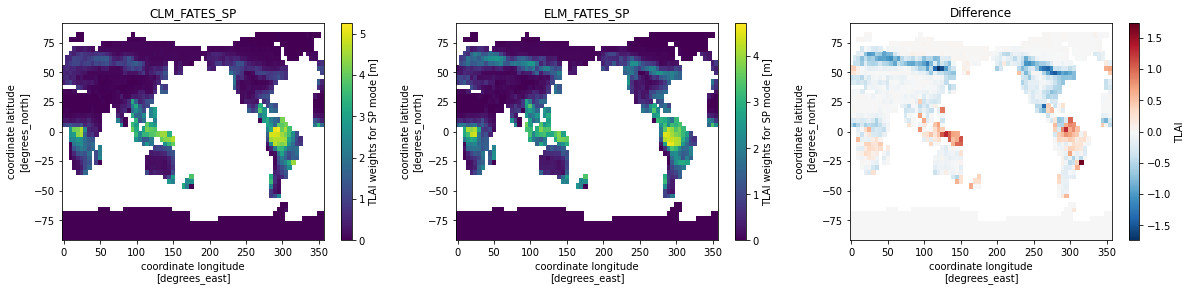

In [5]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_clm.isel(time=tstop_idx).plot(ax=ax1)
tlai_elm.isel(time=tstop_idx).plot(ax=ax2)
(tlai_clm-tlai_elm).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM_FATES_SP')
ax2.set_title('ELM_FATES_SP')
ax3.set_title('Difference')

### ELM big leaf sp mode versus ELM-FATES sp mode

Text(0.5, 1.0, 'Difference')

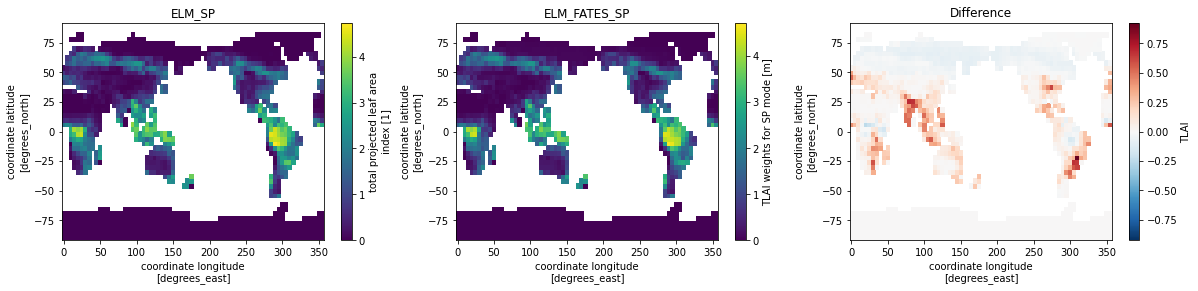

In [6]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_elmsp.isel(time=tstop_idx).plot(ax=ax1)
tlai_elm.isel(time=tstop_idx).plot(ax=ax2)
(tlai_elmsp-tlai_elm).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('ELM_SP')
ax2.set_title('ELM_FATES_SP')
ax3.set_title('Difference')

### CLM big leaf sp mode versus CLM-FATES sp mode

Text(0.5, 1.0, 'Difference')

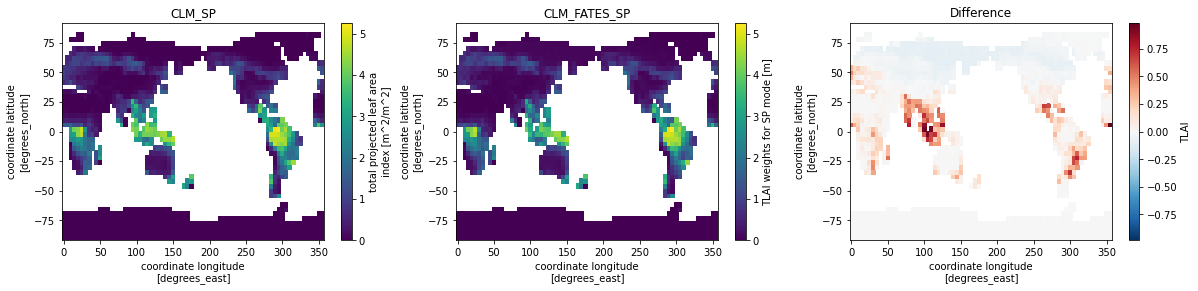

In [7]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_clmsp.isel(time=tstop_idx).plot(ax=ax1)
tlai_clm.isel(time=tstop_idx).plot(ax=ax2)
(tlai_clmsp-tlai_clm).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM_SP')
ax2.set_title('CLM_FATES_SP')
ax3.set_title('Difference')

### CLM bigleaf sp mode versus ELM bigleaf sp mode

Text(0.5, 1.0, 'Difference')

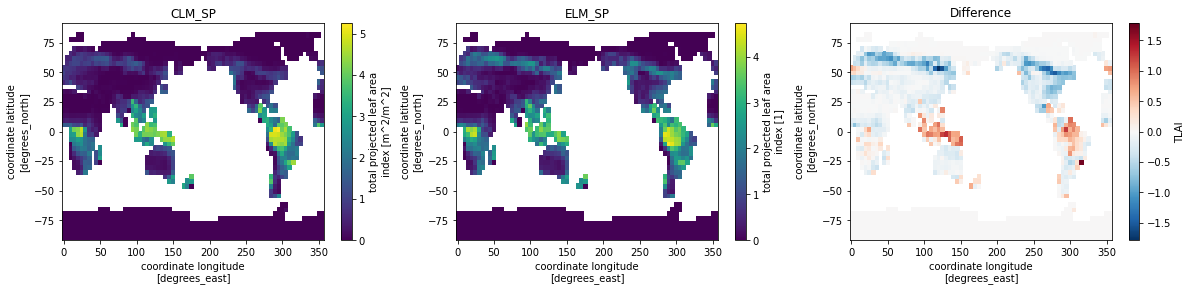

In [8]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_clmsp.isel(time=tstop_idx).plot(ax=ax1)
tlai_elmsp.isel(time=tstop_idx).plot(ax=ax2)
(tlai_clmsp-tlai_elmsp).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM_SP')
ax2.set_title('ELM_SP')
ax3.set_title('Difference')

### Difference between ELM/CLM bigleaf difference and ELM/CLM fates sp mode difference

Text(0.5, 1.0, 'Difference')

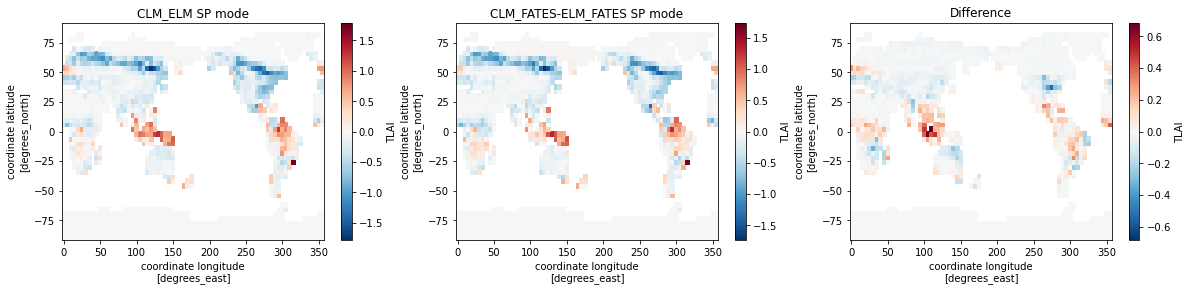

In [9]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
(tlai_clmsp-tlai_elmsp).isel(time=tstop_idx).plot(ax=ax1)
(tlai_clm-tlai_elm).isel(time=tstop_idx).plot(ax=ax2)
((tlai_clmsp-tlai_elmsp)-(tlai_clm-tlai_elm)).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM_ELM SP mode')
ax2.set_title('CLM_FATES-ELM_FATES SP mode')
ax3.set_title('Difference')

### Difference between ELM bigleaf/fates-sp difference and CLM bigleaf/fates-sp difference

Text(0.5, 1.0, 'Difference')

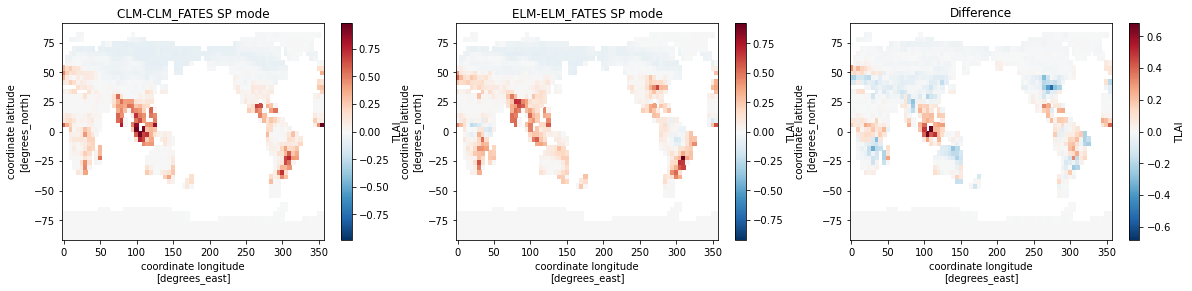

In [10]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
(tlai_clmsp-tlai_clm).isel(time=tstop_idx).plot(ax=ax1)
(tlai_elmsp-tlai_elm).isel(time=tstop_idx).plot(ax=ax2)
((tlai_clmsp-tlai_clm)-(tlai_elmsp-tlai_elm)).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM-CLM_FATES SP mode')
ax2.set_title('ELM-ELM_FATES SP mode')
ax3.set_title('Difference')

### Difference between difference of differences

Text(0.5, 1.0, 'Difference')

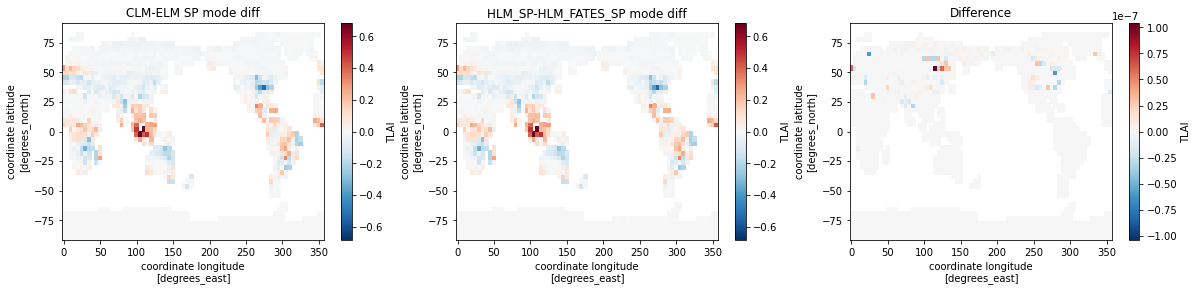

In [11]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
((tlai_clmsp-tlai_clm)-(tlai_elmsp-tlai_elm)).isel(time=tstop_idx).plot(ax=ax1)
((tlai_clmsp-tlai_elmsp)-(tlai_clm-tlai_elm)).isel(time=tstop_idx).plot(ax=ax2)
(((tlai_clmsp-tlai_clm)-(tlai_elmsp-tlai_elm))-((tlai_clmsp-tlai_elmsp)-(tlai_clm-tlai_elm))).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM-ELM SP mode diff')
ax2.set_title('HLM_SP-HLM_FATES_SP mode diff')
ax3.set_title('Difference')

## TSAI

In [12]:
tsai_clm = clm_fates.TSAI
tsai_elm = elm_fates.TSAI
tsai_elmsp = elm_sp.TSAI
tsai_clmsp = clm_sp.TSAI

### CLM-FATES sp mode versus ELM-FATES sp mode

Text(0.5, 1.0, 'Difference')

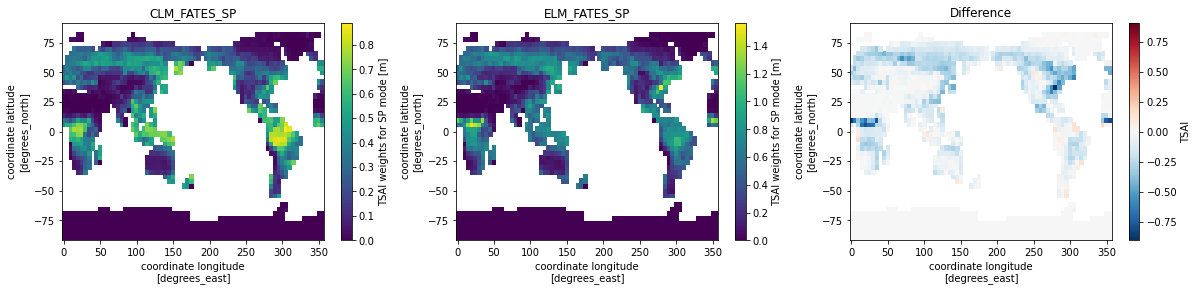

In [13]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tsai_clm.isel(time=tstop_idx).plot(ax=ax1)
tsai_elm.isel(time=tstop_idx).plot(ax=ax2)
(tsai_clm-tsai_elm).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM_FATES_SP')
ax2.set_title('ELM_FATES_SP')
ax3.set_title('Difference')

### ELM big leaf sp mode versus ELM-FATES sp mode

Text(0.5, 1.0, 'Difference')

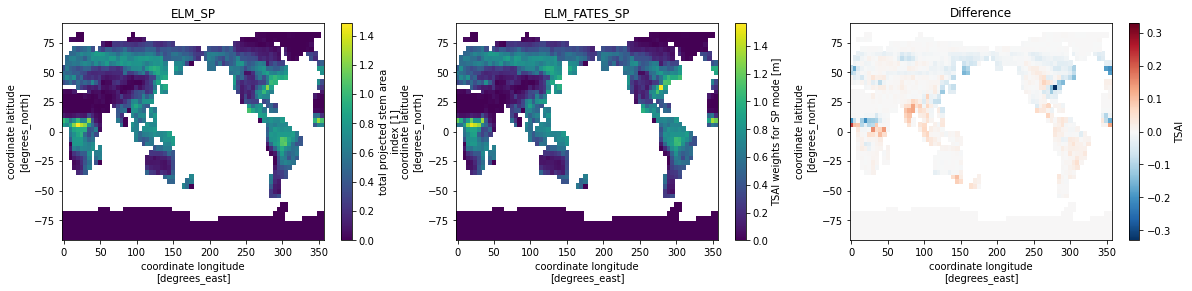

In [14]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tsai_elmsp.isel(time=tstop_idx).plot(ax=ax1)
tsai_elm.isel(time=tstop_idx).plot(ax=ax2)
(tsai_elmsp-tsai_elm).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('ELM_SP')
ax2.set_title('ELM_FATES_SP')
ax3.set_title('Difference')

### CLM big leaf sp mode versus CLM-FATES sp mode

Text(0.5, 1.0, 'Difference')

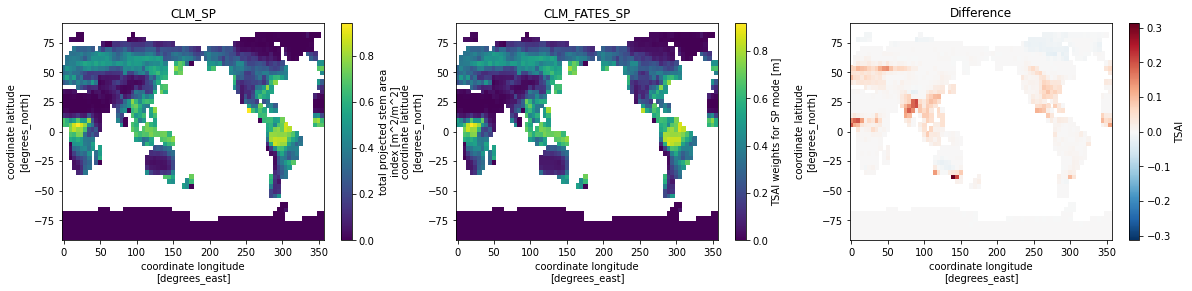

In [15]:
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tsai_clmsp.isel(time=tstop_idx).plot(ax=ax1)
tsai_clm.isel(time=tstop_idx).plot(ax=ax2)
(tsai_clmsp-tsai_clm).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM_SP')
ax2.set_title('CLM_FATES_SP')
ax3.set_title('Difference')

### CLM bigleaf sp mode versus ELM bigleaf sp mode

Text(0.5, 1.0, 'Difference')

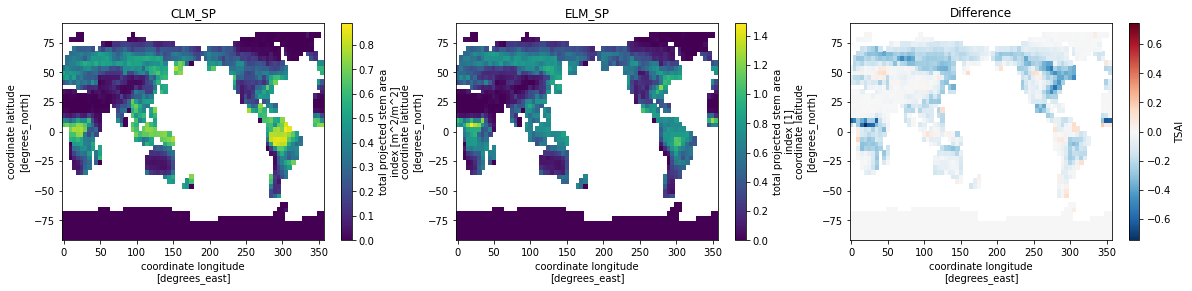

In [16]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tsai_clmsp.isel(time=tstop_idx).plot(ax=ax1)
tsai_elmsp.isel(time=tstop_idx).plot(ax=ax2)
(tsai_clmsp-tsai_elmsp).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM_SP')
ax2.set_title('ELM_SP')
ax3.set_title('Difference')

### Difference between ELM/CLM bigleaf difference and ELM/CLM fates sp mode difference

Text(0.5, 1.0, 'Difference')

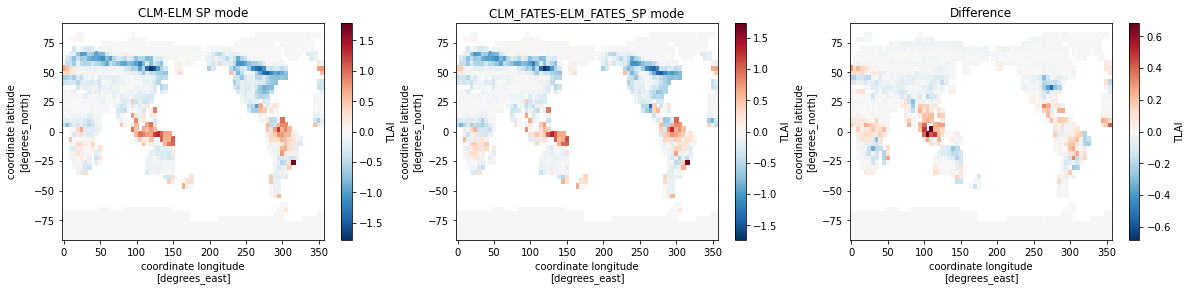

In [17]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
(tlai_clmsp-tlai_elmsp).isel(time=tstop_idx).plot(ax=ax1)
(tlai_clm-tlai_elm).isel(time=tstop_idx).plot(ax=ax2)
((tlai_clmsp-tlai_elmsp)-(tlai_clm-tlai_elm)).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM-ELM SP mode')
ax2.set_title('CLM_FATES-ELM_FATES_SP mode')
ax3.set_title('Difference')

### Difference between ELM bigleaf/fates-sp difference and CLM bigleaf/fates-sp difference

Text(0.5, 1.0, 'Difference')

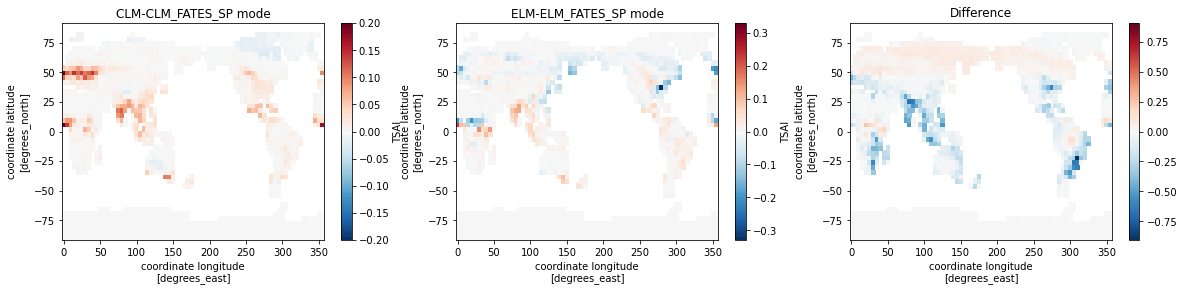

In [18]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
(tsai_clmsp-tsai_clm).isel(time=tstop_idx).plot(ax=ax1)
(tsai_elmsp-tsai_elm).isel(time=tstop_idx).plot(ax=ax2)
((tsai_clmsp-tsai_clm)-(tlai_elmsp-tlai_elm)).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM-CLM_FATES_SP mode')
ax2.set_title('ELM-ELM_FATES_SP mode')
ax3.set_title('Difference')

## HTOP

Note that clm and elm don't include `htop` output by default and isn't included here for non-fates runs

In [19]:
htop_clm = clm_fates.HTOP
htop_elm = elm_fates.HTOP

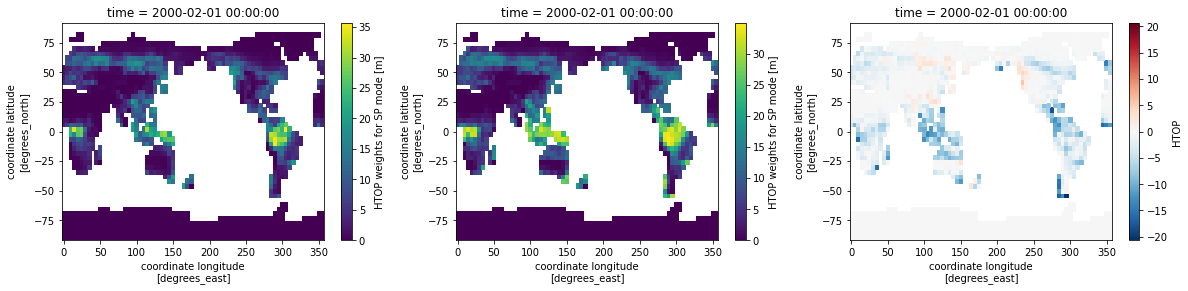

In [20]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
htop_clm.isel(time=tstop_idx).plot(ax=ax1)
htop_elm.isel(time=tstop_idx).plot(ax=ax2)
(htop_clm-htop_elm).isel(time=tstop_idx).plot(ax=ax3)

## GPP

In [21]:
gpp_clm = clm_fates.GPP
gpp_elm = elm_fates.GPP

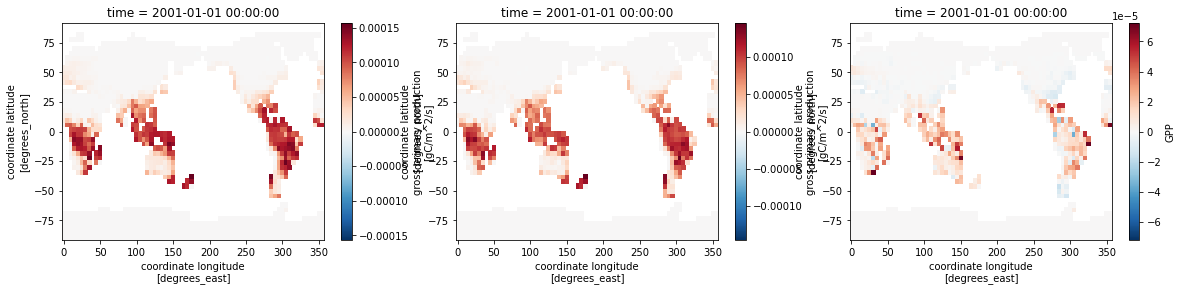

In [22]:
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_clm.isel(time=tstop_idx).plot(ax=ax1)
gpp_elm.isel(time=tstop_idx).plot(ax=ax2)
(gpp_clm-gpp_elm).isel(time=tstop_idx).plot(ax=ax3)

## PFTnindivs

In [23]:
clm_fates.PFTnindivs.dims

('time', 'fates_levpft', 'lat', 'lon')

In [24]:
clm_nind = clm_fates.PFTnindivs
elm_nind = elm_fates.PFTnindivs

In [25]:
figs = (16,8)
tstop_idx = 11

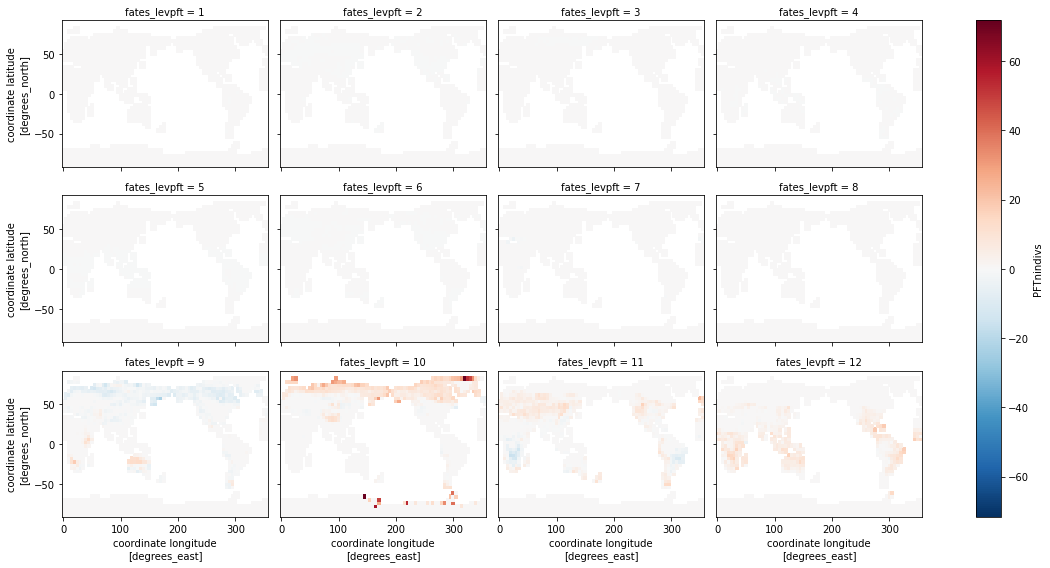

In [26]:
(clm_nind-elm_nind).isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

## PFTbiomass

In [27]:
clm_fates.PFTbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [28]:
clm_pbm = clm_fates.PFTbiomass
elm_pbm = elm_fates.PFTbiomass

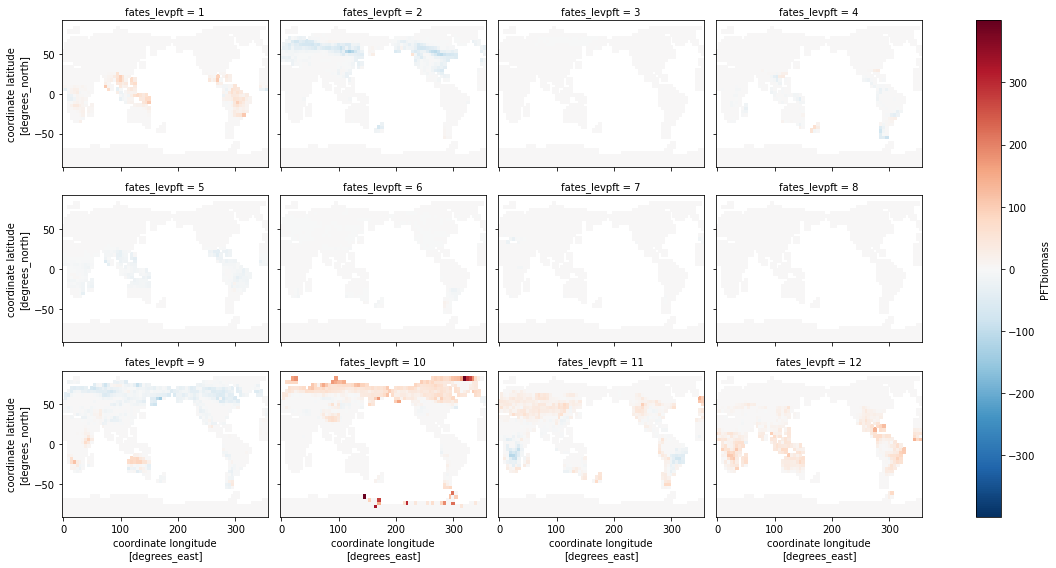

In [29]:
(clm_pbm - elm_pbm).isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

## PFTleafbiomass

In [30]:
clm_fates.PFTleafbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [31]:
clm_plbm = clm_fates.PFTleafbiomass
elm_plbm = elm_fates.PFTleafbiomass

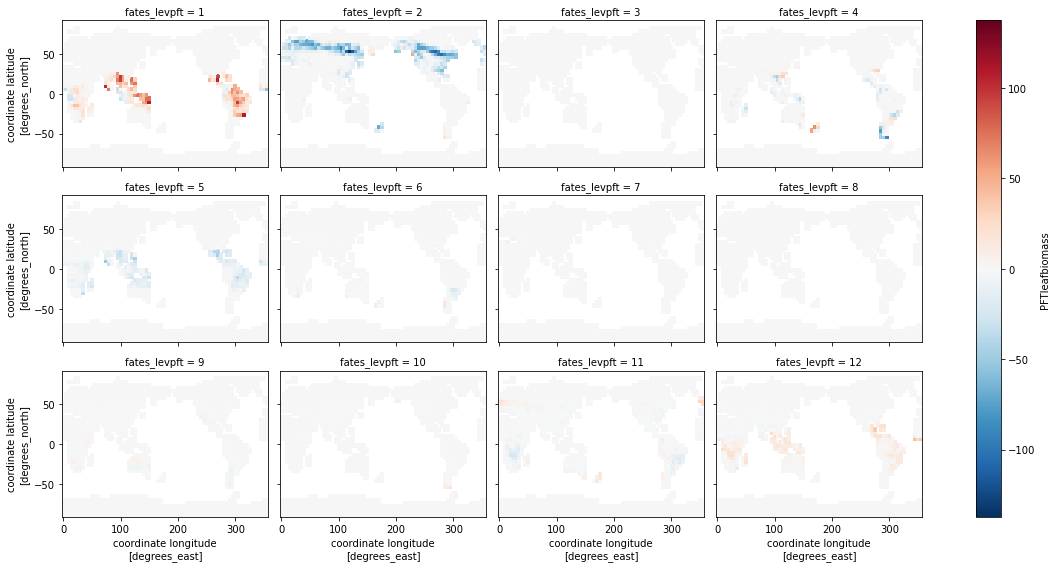

In [32]:
(clm_plbm - elm_plbm).isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

## Crown Area

In [33]:
clm_fates.PFTcrownarea.dims

('time', 'fates_levpft', 'lat', 'lon')

In [34]:
clm_ca = clm_fates.PFTcrownarea
elm_ca = elm_fates.PFTcrownarea

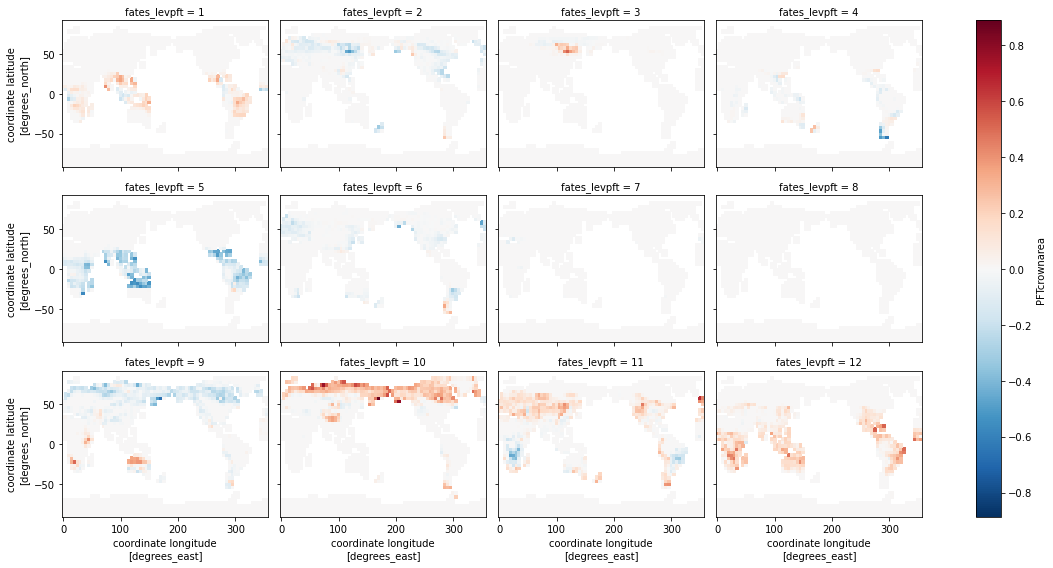

In [35]:
(clm_ca - elm_ca).isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

## Surface data set comparison

In [36]:
tlai_elmsurf = elm_surfdata.MONTHLY_LAI.sum(dim='lsmpft')
tlai_clmsurf = clm_surfdata.MONTHLY_LAI.sum(dim='lsmpft')

In [37]:
tlai_clmsurf.dims

('time', 'lsmlat', 'lsmlon')

Text(0.5, 1.0, 'Difference')

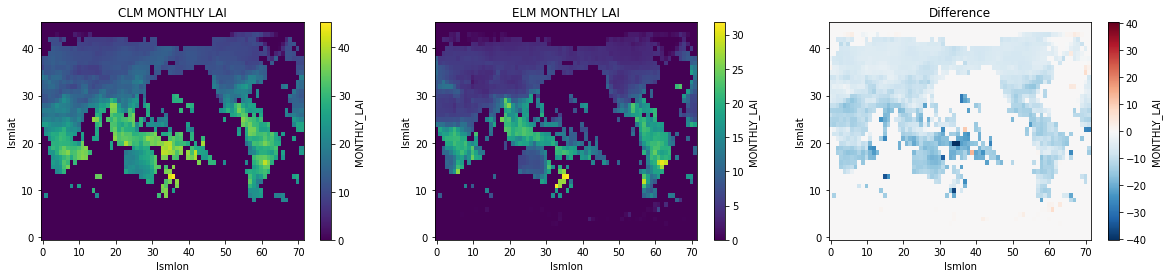

In [38]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_elmsurf.isel(time=tstop_idx).plot(ax=ax1)
tlai_clmsurf.isel(time=tstop_idx).plot(ax=ax2)
(tlai_clmsurf-tlai_elmsurf).isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('CLM MONTHLY LAI')
ax2.set_title('ELM MONTHLY LAI')
ax3.set_title('Difference')

In [40]:
# HLM InterpMonthly code
ndaypm= [31,28,31,30,31,30,31,31,30,31,30,31]
kmo = 0
kda = 9
it = [0,0]
months = [0,0]
timwt = [0,0]

t = (kda-0.5) / ndaypm[kmo]
it[0] = t + 0.5
it[1] = it[0] + 1
months[0] = kmo + it[0] - 1
months[1] = kmo + it[1] - 1
if (months[0] <  1):
    months[0] = 12
if (months[1] > 12):
    months[1] = 1
timwt[0] = (it[0]+0.5) - t
timwt[1] = 1.0-timwt[0]
print(timwt)

[1.0, 0.0]
